# Projeto 2 - Estudo de Caso: Titanic

Notebook de testes.

In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
print(f'O Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O Dataset possui 891 linhas e 12 colunas.


**Ponto**

* PassengerId poderia ser índice do DataFrame

In [146]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# Precisamos entender melhor do que se trata cada atributo
# Por enquanto, vejamos alguns dados adicionais

print(f'Quantidade de linhas: {df.shape[0]}\nQuantidade de colunas: {df.shape[1]}')

Quantidade de linhas: 891
Quantidade de colunas: 12


In [153]:
# Há dados faltantes?
df.isnull().values.any()

True

In [154]:
# Contabilizando
df.isnull().values.sum()

689

In [5]:
# Infos adicionais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Ponto**:
* Age, Cabin e Embarked possuem dados nulos. Entender os motivos e definir se vale a pena excluir,

In [6]:
# Estatísticas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Entender o que é SibSP e Parch

In [8]:
# Mudando indice
df.set_index('PassengerId', inplace=True)

In [164]:
df.duplicated().any()

False

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Qual a idade média dos sobreviventes?**

In [11]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [13]:
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [14]:
df.groupby('Survived').count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,
0,549,549,549,424,549,549,549,549,68,549
1,342,342,342,290,342,342,342,342,136,340


In [16]:
100 * 342/(342+549)

38.38383838383838

In [19]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df.groupby(['Embarked', 'Survived']).count()['Name']

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Name, dtype: int64

In [30]:
df.groupby(['Embarked', 'Survived']).count()['Name']['C']

Survived
0    75
1    93
Name: Name, dtype: int64

In [31]:
# Taxa de sobreviventes por classe
print('C')

C


In [39]:
c = df.groupby(['Embarked', 'Survived']).count()['Name']['C']
q = df.groupby(['Embarked', 'Survived']).count()['Name']['Q']
s = df.groupby(['Embarked', 'Survived']).count()['Name']['S']

In [42]:
tc = 100 * c[1] / c.sum()
tq = 100 * q[1] / q.sum()
ts = 100 * s[1] / s.sum()

In [43]:
print('Taxa de sobreviventes por classe')
print(f'C: {tc:.2f}%')
print(f'Q: {tq:.2f}%')
print(f'S: {ts:.2f}%')

Taxa de sobreviventes por classe
C: 55.36%
Q: 38.96%
S: 33.70%


In [44]:
# Visualizando novamente
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [47]:
idade_surv = df.groupby('Survived').mean()['Age'][1]

In [49]:
# Média de idade de sobreviventes
print(f'A média de idade dos sobreviventes foi de {int(idade_surv)} anos.')

A média de idade dos sobreviventes foi de 28 anos.


In [50]:
df.groupby('Survived').count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,
0,549,549,549,424,549,549,549,549,68,549
1,342,342,342,290,342,342,342,342,136,340


In [54]:
# O que seria PClass? Talvez não seja EMBARKED
df.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [56]:
df.groupby(['Pclass', 'Survived']).count()

Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Pclass Survived                                                             
1      0           80   80   64     80     80      80    80     59        80
       1          136  136  122    136    136     136   136    117       134
2      0           97   97   90     97     97      97    97      3        97
       1           87   87   83     87     87      87    87     13        87
3      0          372  372  270    372    372     372   372      6       372
       1          119  119   85    119    119     119   119      6       119

In [64]:
df.groupby(['Pclass', 'Survived']).count()['Name']

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Name, dtype: int64

In [65]:
df.groupby(['Pclass', 'Survived']).count()['Name'][1]

Survived
0     80
1    136
Name: Name, dtype: int64

In [68]:
# Agora sim, calculando taxa de sobreviventes de acordo com a Classe
classe_1 = df.groupby(['Pclass', 'Survived']).count()['Name'][1]
classe_2 = df.groupby(['Pclass', 'Survived']).count()['Name'][2]
classe_3 = df.groupby(['Pclass', 'Survived']).count()['Name'][3]

taxa_1 = 100 *  classe_1[1] / classe_1.sum()
taxa_2 = 100 * classe_2[1] / classe_2.sum()
taxa_3 = 100 * classe_3[1] / classe_3.sum()

In [69]:
# Comunicando
print(f'Taxa de sobreviventes da Classe 1: {taxa_1:.2f}%')
print(f'Taxa de sobreviventes da Classe 2: {taxa_2:.2f}%')
print(f'Taxa de sobreviventes da Classe 3: {taxa_3:.2f}%')

Taxa de sobreviventes da Classe 1: 62.96%
Taxa de sobreviventes da Classe 2: 47.28%
Taxa de sobreviventes da Classe 3: 24.24%


In [70]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
# Verificar média de idades por classe
df.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


Mais velhos - mais ricos - classes melhores

Fare deve ser algo relacionado aos ganhos financeiros

In [73]:
# Parece que todos da Classe 3 possuem Cabin = NaN?
df_c3 = df.query('Pclass == 3')

In [74]:
df_c3.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [75]:
df_c3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 1 to 891
Data columns (total 11 columns):
Survived    491 non-null int64
Pclass      491 non-null int64
Name        491 non-null object
Sex         491 non-null object
Age         355 non-null float64
SibSp       491 non-null int64
Parch       491 non-null int64
Ticket      491 non-null object
Fare        491 non-null float64
Cabin       12 non-null object
Embarked    491 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 46.0+ KB


Apenas 12 valores preenchidos para Cabin.

Tarefa futura. Verificar a porcentagem de homens e mulheres por cada uma das classes. Acho que é melhor por groupby. Principalmente para plotar gráficos.

In [76]:
df_c3.groupby('Sex').count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,144,144,144,102,144,144,144,144,6,144
male,347,347,347,253,347,347,347,347,6,347


Calculando taxa de sobreviventes por classe e sexo.

In [93]:
df.groupby(['Pclass', 'Survived', 'Sex']).count()

Name  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Pclass Survived Sex                                                           
1      0        female     3    3      3      3       3     3      3         3
                male      77   61     77     77      77    77     56        77
       1        female    91   82     91     91      91    91     78        89
                male      45   40     45     45      45    45     39        45
2      0        female     6    6      6      6       6     6      1         6
                male      91   84     91     91      91    91      2        91
       1        female    70   68     70     70      70    70      9        70
                male      17   15     17     17      17    17      4        17
3      0        female    72   55     72     72      72    72      2        72
                male     300  215    300    300     300   300      4       300
       1        female    72   47     72     72      72    72      4        72
                male      47   38     47     47      47    47      2        47

In [94]:
df.groupby(['Pclass', 'Survived', 'Sex']).count()['Name']

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: Name, dtype: int64

In [99]:
df.groupby(['Pclass', 'Survived', 'Sex']).count()['Name'][1][1]

Sex
female    91
male      45
Name: Name, dtype: int64

In [100]:
s1 = df.groupby(['Pclass', 'Survived', 'Sex']).count()['Name'][1][1]
s2 = df.groupby(['Pclass', 'Survived', 'Sex']).count()['Name'][2][1]
s3 = df.groupby(['Pclass', 'Survived', 'Sex']).count()['Name'][3][1]

tf1 = 100 * s1['female'] / s1.sum()
tm1 = 100 - tf1

tf2 = 100 * s2['female'] / s2.sum()
tm2 = 100 - tf2

tf3 = 100 * s3['female'] / s3.sum()
tm3 = 100 - tf3

In [101]:
print(f'Taxa de sobreviventes da Classe 1 - Sexo Feminino: {tf1:.2f}%')
print(f'Taxa de sobreviventes da Classe 1 - Sexo Masculino: {tm1:.2f}%')
print()
print(f'Taxa de sobreviventes da Classe 2 - Sexo Feminino: {tf2:.2f}%')
print(f'Taxa de sobreviventes da Classe 2 - Sexo Masculino: {tm2:.2f}%')
print()
print(f'Taxa de sobreviventes da Classe 3 - Sexo Feminino: {tf3:.2f}%')
print(f'Taxa de sobreviventes da Classe 3 - Sexo Masculino: {tm3:.2f}%')

Taxa de sobreviventes da Classe 1 - Sexo Feminino: 66.91%
Taxa de sobreviventes da Classe 1 - Sexo Masculino: 33.09%

Taxa de sobreviventes da Classe 2 - Sexo Feminino: 80.46%
Taxa de sobreviventes da Classe 2 - Sexo Masculino: 19.54%

Taxa de sobreviventes da Classe 3 - Sexo Feminino: 60.50%
Taxa de sobreviventes da Classe 3 - Sexo Masculino: 39.50%


In [102]:
# Verificando se a média calculada por partes bate com a média total
media_feminina_partes = (tf1 + tf2 + tf3) / 3
media_feminina_partes

69.29191216716572

In [107]:
# Media feminina total
df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [109]:
sex = 'female'
surv = 1

In [114]:
f_surv = df.query('Sex == @sex & Survived == @surv')

In [116]:
f_surv.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [117]:
f_surv.shape[0]

233

In [120]:
survivor = df.query('Survived == @surv')

In [121]:
taxa = 100 * f_surv.shape[0] / survivor.shape[0]
taxa

68.12865497076024

bateu!!!! (Mais ou menos). Será que tem valores nulos no sexo?


In [123]:
df['Sex'].isnull().any()

False

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_surv = df.query('Survived == 1')
df_surv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
df_surv.set_index('PassengerId', inplace=True)

In [18]:
df_surv.groupby('Pclass').count()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,136,136,136,122,136,136,136,136,117,134
2,87,87,87,83,87,87,87,87,13,87
3,119,119,119,85,119,119,119,119,6,119


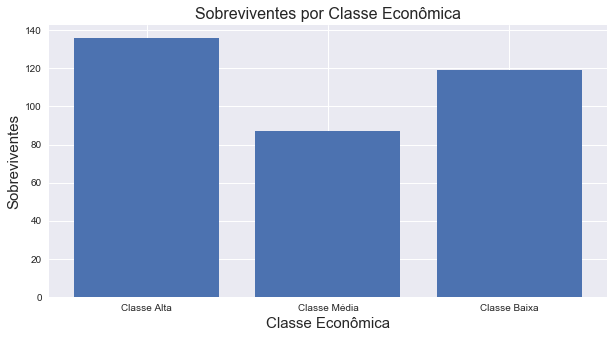

In [39]:
locations = df_surv.groupby('Pclass').count().index
values = df_surv.groupby('Pclass').count()['Survived']

sns.set()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(locations, values)
ax.set_title('Sobreviventes por Classe Econômica', fontsize=16)
plt.xticks([1, 2, 3], ['Classe Alta', 'Classe Média', 'Classe Baixa'])
ax.set_xlabel('Classe Econômica', fontsize=15)
ax.set_ylabel('Sobreviventes', fontsize=15)
plt.show()

Ideia: agrupar por classe e plotar outros parâmetros em forma de barra (semelhante ao gráfico do wine)

In [44]:
sex_counts = df.groupby(['Sex', 'Pclass']).count()['Name']
sex_counts

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Name, dtype: int64

In [48]:
class_total = df.groupby('Pclass').count()['Name']
class_total

Pclass
1    216
2    184
3    491
Name: Name, dtype: int64

In [51]:
man_prop = sex_counts['male'] / class_total
man_prop

Pclass
1    0.564815
2    0.586957
3    0.706721
Name: Name, dtype: float64

In [53]:
fem_prop = sex_counts['female'] / class_total
fem_prop

Pclass
1    0.435185
2    0.413043
3    0.293279
Name: Name, dtype: float64

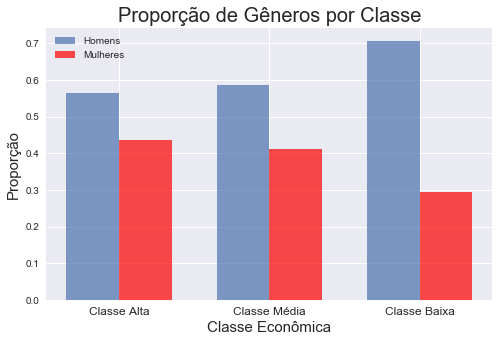

In [79]:
sex_counts = df.groupby(['Sex', 'Pclass']).count()['Name']
class_total = df.groupby('Pclass').count()['Name']
man_prop = sex_counts['male'] / class_total
fem_prop = sex_counts['female'] / class_total

ind = np.arange(len(man_prop))
width = .35

fig, ax = plt.subplots(figsize=(8, 5))
man_bar = plt.bar(ind, man_prop, width, alpha=.7, label='Homens')
fem_bar = plt.bar(ind+width, fem_prop, width, color='r', alpha=.7, label='Mulheres')
plt.ylabel('Proporção', fontsize=15)
plt.xlabel('Classe Econômica', fontsize=15)
plt.title('Proporção de Gêneros por Classe', fontsize=20)
locations = ind + width / 2
labels = ['Classe Alta', 'Classe Média', 'Classe Baixa']
plt.xticks(locations, labels, fontsize=12)
plt.legend()
plt.show()

In [82]:
surv_counts = df.groupby(['Survived', 'Pclass']).count()['Name']
surv_counts

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Name, dtype: int64

In [85]:
class_total = df.groupby('Pclass').count()['Name']
class_total

Pclass
1    216
2    184
3    491
Name: Name, dtype: int64

In [87]:
s_prop = surv_counts[1] / class_total
s_prop

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Name, dtype: float64

In [91]:
v_prop = surv_counts[0] / class_total
v_prop

Pclass
1    0.370370
2    0.527174
3    0.757637
Name: Name, dtype: float64

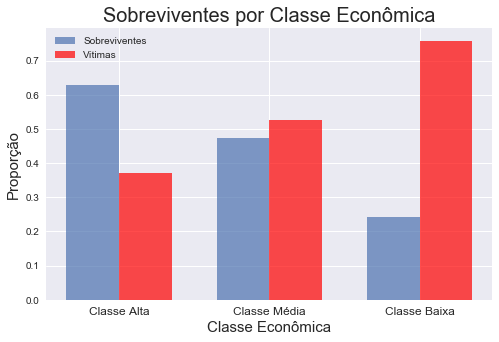

In [93]:
surv_counts = df.groupby(['Survived', 'Pclass']).count()['Name']
class_total = df.groupby('Pclass').count()['Name']
s_prop = surv_counts[1] / class_total
v_prop = surv_counts[0] / class_total

ind = np.arange(len(s_prop))
width = .35

fig, ax = plt.subplots(figsize=(8, 5))
s_bar = plt.bar(ind, s_prop, width, alpha=.7, label='Sobreviventes')
v_bar = plt.bar(ind+width, v_prop, width, color='r', alpha=.7, label='Vítimas')
plt.ylabel('Proporção', fontsize=15)
plt.xlabel('Classe Econômica', fontsize=15)
plt.title('Sobreviventes por Classe Econômica', fontsize=20)
locations = ind + width / 2
labels = ['Classe Alta', 'Classe Média', 'Classe Baixa']
plt.xticks(locations, labels, fontsize=12)
plt.legend()
plt.show()

In [100]:
df['Age'].isnull().values.sum()

177

In [107]:
df['Age'].mean()

29.69911764705882

In [108]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [110]:
df['Age'].isnull().any()

False

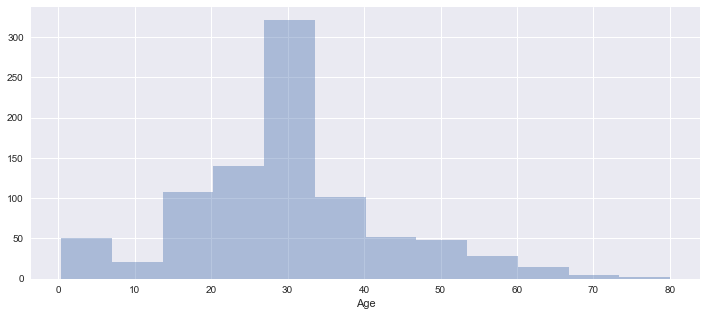

In [120]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Age'], kde=False, bins=12);

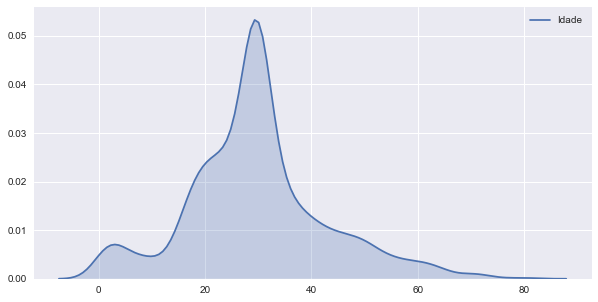

In [124]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(df['Age'], shade=True, label='Idade');

In [125]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
df['Fare'].isnull().any()

False

**Investigar se houve referência entre sobreviventes e Cabines** R: Não

**Primeiro de tudo; postar gráfico de pizza com sobreviventes e vítimas**

**Realizar um CUT() com a coluna 'Fare' e dividir** / Plotar gráfico de Classe Social / Fare ou Gênero / Fare ou Survived / Fare

In [135]:
df.query('Pclass == 1')['Fare'].mean()

84.15468749999992

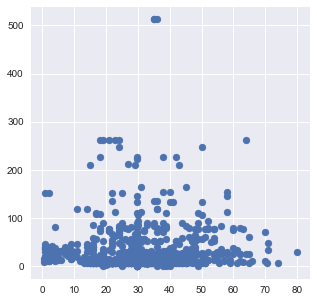

In [138]:
# Correlaçãoentre idade e Fare
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['Age'], df['Fare'])

** O que é Parch? **

In [140]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64